<a href="https://colab.research.google.com/github/PJ14ssi/Samsung-AI-2023-Code-B/blob/main/Code_B_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Created on 24 March 2023 
# Author(s): Jan-Marini Pacleb, Danait Aregay, Freda Dorbu, Joan Ejeta, Jasmin Hicks, Jayda Ritchie


In [ ]:
# importing libraries for running the deep learning model
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, confusion_matrix, roc_curve, auc, recall_score
from sklearn.model_selection import learning_curve
import seaborn as sns
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

# imports files from the google drive to run in google colab
from google.colab import files
import os

In [ ]:
# This portion of the code was to convert the Palsy .BMP files into JPG files


from pathlib import Path 
from PIL import Image                                                                                                                             import os
import glob
import time
start_time = time.time()


current_dir = Path('C:/Users/jmpacleb/Downloads/Palsy Bigger').resolve()

out_dir = current_dir / "converted"
os.mkdir(out_dir)
cnt = 0

for img in glob.glob(str(current_dir / "*.bmp")):
    filename = Path(img).stem
     Image.open(img).save(str(out_dir / f'{filename}.jpg'))


print("Finished in %.4s seconds" % (time.time() - start_time))


In [ ]:
# mounts google drive to google colab notebook to access images stored in google drive within colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# locates the files in a zipped-folder within our capstone google drive
!unzip '/content/drive/MyDrive/Capstone Project/Images/Code Training/Three Classes v2.zip'

In [ ]:
# prepares dataset of images to be used in deep learning
# first line defines the file path to the directory containing the unzipped set of images
# second line extracts the file path where the images are and stores them in a list of labels
# therefore we have three classes

image_path = r'/content/Bigger Test'
image_path = os.path.join(os.path.dirname(image_path), 'Bigger Test')

print(image_path)

labels = []
for i in os.listdir(image_path):
  if os.path.isdir(os.path.join(image_path, i)):
    labels.append(i)
print(labels)

print('Finished!')

/content/Bigger Test
['Healthy', 'Stroke', 'Palsy']
Finished!


In [ ]:
import os
import random
import numpy as np
from PIL import Image, ImageOps, ImageEnhance, ImageFilter

input_folder = r'/content/Bigger Test/Palsy' # there was not enough image augmentation for Palsy as we  have a small patient pool
output_folder = r'/content/Output Test'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Specify the number of augmented images to create for each input image
augmented_images_per_input = 5

def apply_transformations(image, transformations):
    applied_transformations = []
    for transformation, name in transformations:
        image = transformation(image)
        applied_transformations.append(name)
    return image, '_'.join(applied_transformations)

def random_transformations():
    all_transformations = [
        (lambda img: ImageOps.mirror(img) if random.random() < 0.5 else img, 'mirror'),
        (lambda img: ImageEnhance.Brightness(img).enhance(random.uniform(0.5, 1.5)), 'brightness'),
        (lambda img: ImageEnhance.Contrast(img).enhance(random.uniform(0.5, 1.5)), 'contrast'),
        (lambda img: img.filter(ImageFilter.GaussianBlur(random.uniform(0.5, 1.5))), 'blur'),
        (lambda img: img.transform(img.size, Image.AFFINE, (1, 0, 0, random.uniform(-0.1, 0.1), 1, 0), Image.BICUBIC), 'skew'),
        (lambda img: img.rotate(random.uniform(-2, 2), resample=Image.BICUBIC, expand=False), 'rotation')
    ]
    # Modify to change Randomly choosen number of transformations to apply to the image
    num_transformations = random.randint(2, 3)
    return random.sample(all_transformations, num_transformations)

for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        input_filepath = os.path.join(input_folder, filename)
        image = Image.open(input_filepath)

        for i in range(augmented_images_per_input):
            transformations = random_transformations()
            augmented_image, transformations_str = apply_transformations(image, transformations)
            output_filename = f"augmented_{i}_{transformations_str}_{filename}"
            output_filepath = os.path.join(output_folder, output_filename)
            augmented_image.save(output_filepath, "JPEG")

print("Data augmentation completed.")



S

Data augmentation completed.


In [ ]:
import os

# Set the paths of the source and destination directories
src_dir = r'/content/Output Test'
dst_dir = r'/content/Bigger Test/Palsy'

# Get the list of all the files in the source directory
files = os.listdir(src_dir)

# Loop through the files and move the files with the ".txt" extension to the destination directory
for file in files:
    if file.endswith(".jpg"):
        src_path = os.path.join(src_dir, file)
        dst_path = os.path.join(dst_dir, file)
        os.rename(src_path, dst_path)

# New Section

In [ ]:
# code displays a set of 10 examples from each class
NUM_EXAMPLES = 10

for label in labels:
  label_dir = os.path.join(image_path, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

In [ ]:
# created two data generators: 1) iamge data and 2) validation
# the generators willl load images from a data_dir directory and apply ome image augmentation to the images during training





data_dir = image_path # file path containing image
img_size = (150, 150) # resizes the images
batch_size = 32 # the number of images that will be process and processed at one time during each training iteration
num_epochs = 20 # the number of times the training data will be looped
learning_rate = 0.003 # the optimizer during training 

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25) # validation_split 


train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')
print('Training pool')
  
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')
print('Validation pool')

Found 15564 images belonging to 3 classes.
Training pool
Found 5186 images belonging to 3 classes.
Validation pool


In [ ]:
# Create a new generator for evaluation /WITHOUT/ shuffling
#eval_generator = datagen.flow_from_directory(
    #data_dir,
    #target_size=img_size,
    #batch_size=batch_size,
    #class_mode='categorical',
   # subset='validation',
    #shuffle=False)


# the code above is a attempt to see how well the model worths WITHOUT shuffling - we opted to use with shuffling to give potentially better results

In [ ]:
# Create a new generator for evaluation /WITH/ shuffling
eval_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True)


# Images already stratified and proportional

Found 5186 images belonging to 3 classes.


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(3, activation='softmax')
      # layers.Dense(3...) was changed from layers.Dense(4...) in a pervious version because we consolidated both 'no_Stroke healthy' data with 'Healthy' data
])

In [ ]:
# code defines an optimizer using Adam optimizer with a learning rate
# evaluation metrics is cross-entropy loss function and accuracy

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=num_epochs,
                    validation_data=val_generator)

loss, accuracy = model.evaluate(val_generator)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)


# used to calculate the confusion matrix and recall score

y_true = eval_generator.classes
y_pred_probs = model.predict(eval_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

conf_mat = confusion_matrix(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(val_generator.class_indices)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

Epoch 1/20
487/487 [==============================] - 1070s 2s/step - loss: 0.3741 - accuracy: 0.9181 - val_loss: 0.2218 - val_accuracy: 0.9422
Epoch 2/20
487/487 [==============================] - 991s 2s/step - loss: 0.2151 - accuracy: 0.9534 - val_loss: 0.1473 - val_accuracy: 0.9728
Epoch 3/20
487/487 [==============================] - 967s 2s/step - loss: 0.1774 - accuracy: 0.9594 - val_loss: 0.1410 - val_accuracy: 0.9759
Epoch 4/20
487/487 [==============================] - 965s 2s/step - loss: 0.1700 - accuracy: 0.9598 - val_loss: 0.1054 - val_accuracy: 0.9840
Epoch 5/20
487/487 [==============================] - 904s 2s/step - loss: 0.1475 - accuracy: 0.9679 - val_loss: 0.1025 - val_accuracy: 0.9850
Epoch 6/20
487/487 [==============================] - 953s 2s/step - loss: 0.1496 - accuracy: 0.9669 - val_loss: 0.1547 - val_accuracy: 0.9568
Epoch 7/20
487/487 [==============================] - 969s 2s/step - loss: 0.1347 - accuracy: 0.9726 - val_loss: 0.0940 - val_accuracy: 0.985

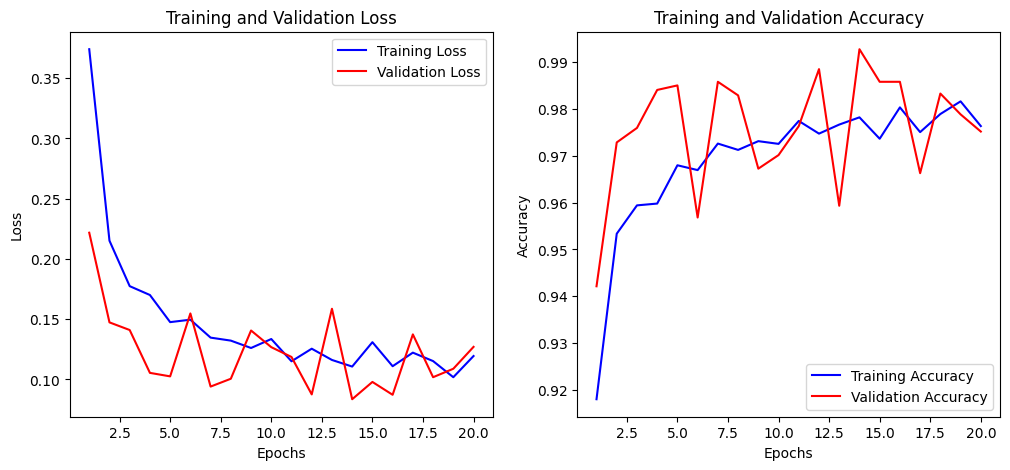

In [ ]:
# plot the training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, num_epochs+1)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(epochs, train_loss, 'b-', label='Training Loss')
axs[0].plot(epochs, val_loss, 'r-', label='Validation Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(epochs, train_acc, 'b-', label='Training Accuracy')
axs[1].plot(epochs, val_acc, 'r-', label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.show()

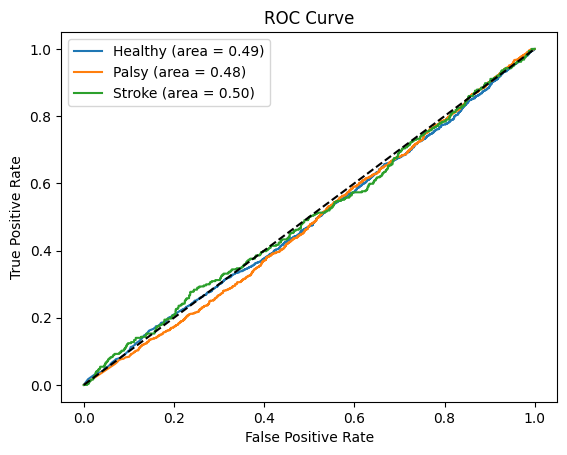

In [ ]:
# get class names from generator class indices
# the code generates a ROC curve the multi-class classification model
# ROC curve is an evaluation metrics in sckit-learn library


class_names = list(val_generator.class_indices.keys())

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Confusion Matrix:
 [[2665  830  177]
 [ 905  240   55]
 [ 227   68   19]]
Recall (macro): 0.32875736045774767


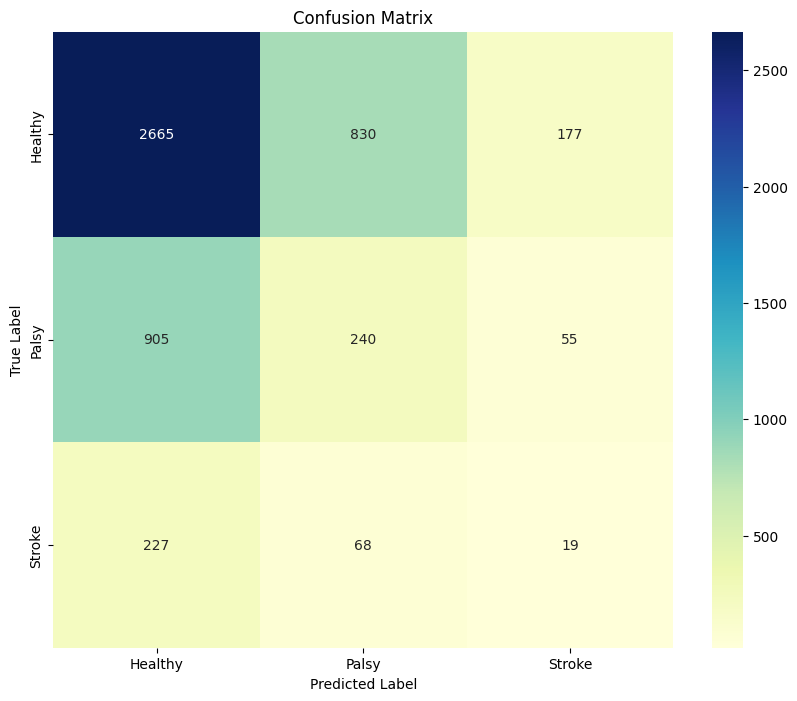

In [ ]:


# Plots the confusion matrix as a heatmap. 
# The confusion matrix is calculated based on the true labels and the predicted labels, and shows the number of true positives, false positives, true negatives, and false negatives for each class. 

# The recall score is a metric that measures the ability of the model to correctly identify a given class, and is calculated as the ratio of true positives to the sum of true positives and false negatives. 
# The heatmap is annotated with the number of observations in each cell, and shows the distribution of the true and predicted labels across the different classes. 


# Print the confusion matrix and recall score

print("Confusion Matrix:\n", conf_mat)
print("Recall (macro):", recall)

# Plot the confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu', xticklabels=val_generator.class_indices, yticklabels=val_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Print interpretation of confusion matrix values
# It shoes the true positive and false positive for each class of the predicted model
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i == j:
            print(f'True {class_names[i]}: {conf_mat[i][j]}')
        else:
            print(f'False {class_names[j]} predicted as {class_names[i]}: {conf_mat[i][j]}')



            # scale positional weight is not applicable to our dataset

True Healthy: 2665
False Palsy predicted as Healthy: 830
False Stroke predicted as Healthy: 177
False Healthy predicted as Palsy: 905
True Palsy: 240
False Stroke predicted as Palsy: 55
False Healthy predicted as Stroke: 227
False Palsy predicted as Stroke: 68
True Stroke: 19


163/163 [==============================] - 88s 537ms/step


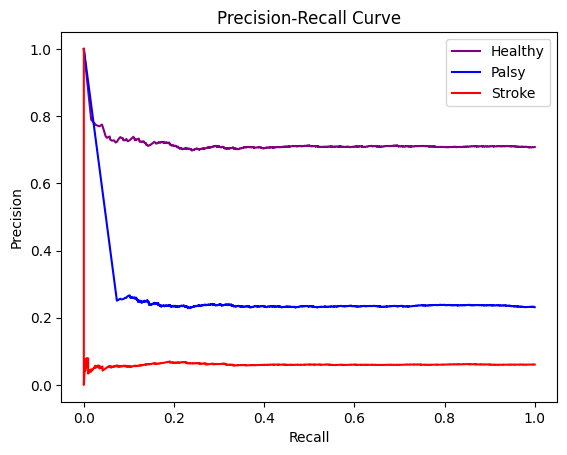

In [ ]:
from sklearn.metrics import precision_recall_curve

y_true = eval_generator.classes
y_pred_probs = model.predict(eval_generator)

n_classes = len(val_generator.class_indices)
precision = dict()
recall = dict()
thresholds = dict()

for i in range(n_classes):
    y_true_i = (y_true == i).astype(int)
    y_pred_probs_i = y_pred_probs[:, i]
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_true_i, y_pred_probs_i)

# create precision-recall curve plot
class_names = list(val_generator.class_indices.keys())
colors = ['purple', 'blue', 'red']
fig, ax = plt.subplots()
for i, color in zip(range(3), colors):
    ax.plot(recall[i], precision[i], color=color, label=class_names[i])

# add axis labels and legend to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.legend()
plt.show()